# Neuropixels Tutorial--In Lab Work

### Name:     


### Date: 


### PID:


### Jupyter Notebook Number: 

## Purpose/Objective:
Insert text. 

## Protocol:
Insert Text.

## Expected Results:
Insert text. 

### Installing AllenSDK into your local environment. 

In [ ]:
pip install --upgrade pip

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Starting Code:
In Python, we also need to import packages to use. Below, we'll import several common packages for scientific computing: numpy, pandas, and matplotlib.

In [2]:
import os
import shutil
import allensdk
import pprint

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


# You may have to change the following code depending on whether you are working with EcephysProjectCache or BrainObservatoryCache. 
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# these imports are specific to ecephys data
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

## Data Access

The data from Allen Brain Observatory experiments are organized into *sessions*, where each session is a distinct period of continuous recording. During a Neuropixels session we collect:

- spike times and other spike features (such as mean waveforms) from up to 6 Neuropixels probes inserted simultaneously into a mouse brain
- local field potentials from each probe
- behavioral data, such as running speed and eye position
- the timing and identity of visual stimuli which were presented to the mouse
- cell-type specific optogenetic stimuli applied at the end of the session

The AllenSDK contains code for accessing across-session (project-level) metadata as well as code for accessing detailed within-session data. The standard workflow is to use project-level tools, such as `EcephysProjectCache` to identify and access sessions of interest, then delve into those sessions' data using `EcephysSession`.

We are running analysis locally on LongLeaf, so the **`EcephysProjectCache` object of the AllenSDK** is the easiest way to retrieve this data. This object abstracts away the details of on-disk file storage, and delivers the data to you as ready-to-analyze Python objects. The cache will automatically keep track of which files are stored on LongLeaf, and will download additional files on an as-needed basis.

For a more detailed looked at data access, check out [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_data_access.html).

In [3]:
#data directory for extracellular ephysdata: /overflow/NSCI274/projects/ecephysdata/
#data directory for 2 photon Ca2+ data: /overflow/NSCI274/projects/ophysdata/
#edit the code below to switch the data from ecephys to ophys

data_directory = "/overflow/NSCI274/projects/ecephysdata/"

manifest_path = os.path.join(data_directory,"manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

This will prepare the cache to download four files:

1. `sessions.csv` (7.8 kB)
2. `probes.csv` (27.0 kB)
3. `channels.csv` (6.6 MB)
4. `units.csv` (51.4 MB)

Each one contains a table of information related to its file name. If you're using the AllenSDK, you won't have to worry about how these files are formatted. Instead, you'll load the relevant data using specific accessor functions: `get_session_table()`, `get_probes()`, `get_channels()`, and `get_units()`. These functions return a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html?highlight=dataframe) containing a row for each item and a column for each metric.

Let's take a closer look at what's in the `sessions.csv` file:

In [8]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head(n=58)

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


The `sessions` DataFrame provides a high-level overview of the Neuropixels Visual Coding dataset. The index column is a unique ID, which serves as a key for accessing the physiology data for each session. The other columns contain information about:

- the session type (i.e., which stimulus set was shown?)
- the age, sex, and genotype of the mouse (in this dataset, there's only one session per mouse)
- the number of probes, channels, and units for each session
- the brain structures recorded (CCFv3 acronyms)

If we want to find all of recordings from female Vip-Cre mice that viewed the Brain Observatory 1.1 stimulus and contain units from area DG (dentate gyrus of hippocampus), we can use the following query:

In [59]:
filtered_sessions = sessions[(sessions.sex == 'F') & \
                             (sessions.full_genotype.str.find('Vip') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print('Total number of sessions: ' + str(len(filtered_sessions)))

filtered_sessions.head()

Total number of sessions: 2


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


The `filtered_sessions` table contains the two sessions that meet these criteria.

The code above uses standard syntax for filtering pandas DataFrames. If this is unfamiliar to you, we strongly recommend reading through the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/). The AllenSDK makes heavy use of pandas objects, so we don't have to come up with our own functions for working with tabular data.

Let's take a look at another DataFrame, extracted from the `probes.csv` file.

In [10]:
probes = cache.get_probes()

print('Total number of probes: ' + str(len(probes)))

probes.head()

Total number of probes: 332


,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"


The `probes` DataFrame contains information about the Neuropixels probes used across all recordings. Each row represents one probe from one recording session, even though the physical probes may have been used in multiple sessions. Some of the important columns are:

- `ecephys_session_id`: the index column of the `sessions` table
- `sampling_rate`: the sampling rate (in Hz) for this probe's spike band; note that each probe has a unique sampling rate around 30 kHz. The small variations in sampling rate across probes can add up to large offsets over time, so it's critical to take these differences into account. However, all of the data you will interact with has been pre-aligned to a common clock, so this value is included only for reference purposes.
- `lfp_sampling_rate`: the sampling rate (in Hz) for this probe's LFP band NWB files, after 2x downsampling from the original rate of 2.5 kHz
- `name`: the probe name is assigned based on the location of the probe on the recording rig. This is useful to keep in mind because probes with the same name are always targeted to the same cortical region and enter the brain from the same angle (`probeA` = AM, `probeB` = PM, `probeC` = V1, `probeD` = LM, `probeE` = AL, `probeF` = RL). However, the targeting is not always accurate, so the actual recorded region may be different.
- `phase`: the data may have been generated by one of two "phases" of Neuropixels probes. **3a** = prototype version; **PXI** = publicly available version ("Neuropixels 1.0"). The two phases should be equivalent from the perspective of data analysis, but there may be differences in the noise characteristics between the two acquisition systems.
- `channel_count`: the number of channels with spikes or LFP data (maximum = 384)

The `channels.csv` file contains information about each of these channels.

In [11]:
channels = cache.get_channels()

print('Total number of channels: ' + str(len(channels)))

channels.head()

Total number of channels: 123224


,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,phase,sampling_rate,has_lfp_data,unit_count
id,,,,,,,,,,,,,,,
849705558,792645504,1,11,20,8165.0,3314.0,6862.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705560,792645504,2,59,40,8162.0,3307.0,6866.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705562,792645504,3,27,40,8160.0,3301.0,6871.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705564,792645504,4,43,60,8157.0,3295.0,6875.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705566,792645504,5,11,60,8155.0,3288.0,6879.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0


The most important columns in the `channels` DataFrame concern each channel's location in physical space. Each channel is associated with a location along the probe shank (`probe_horizontal_position` and `probe_vertical_position`), and may be linked to a coordinate in the Allen Common Coordinate framework (if CCF registration is available for that probe).

The information about channel location will be merged into the `units` DataFrame, which is loaded from `units.csv`:

In [12]:
units = cache.get_units()

print('Total number of units: ' + str(len(units)))

units.head()

Total number of units: 40010


,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,...,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,
915956282,0.611816,164.878740,0.072728,309.71,3.910873,0.535678,850229419,6.519432,0.164824,0.104910,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956340,0.439372,247.254345,0.000881,160.24,5.519024,0.563149,850229419,9.660554,0.206030,0.006825,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956345,0.500520,251.275830,0.001703,129.36,3.559911,0.521943,850229419,12.698430,0.192295,0.044936,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956349,0.424620,177.115380,0.096378,169.29,2.973959,0.508208,850229419,16.192413,0.192295,0.120715,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956356,0.512847,214.954545,0.054706,263.01,2.936851,0.549414,850229419,2.193113,0.233501,0.430427,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt


This DataFrame contains metadata about the available units across all sessions. This table contains a variety of helpful metrics for each unit, such as its firing rate, waveform_amplitude, and CCF structure (`ecephys_structure_acronym`). There are also sorting quality metrics, such as `isi_violations`, `amplitude_cutoff`, and `presence_ratio`. By default, the AllenSDK applies some filters to this table and only returns units above a particular quality threshold.

The default filter values are as follows:

- `isi_violations` < 0.5
- `amplitude_cutoff` < 0.1
- `presence_ratio` > 0.95

For more information about these quality metrics and how to interpret them, please refer to [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html).

If you want to see _all_ of the available units, it's straightfoward to disable the quality metrics filters when retrieving this table: 

In [13]:
units = cache.get_units(amplitude_cutoff_maximum = np.inf,
                        presence_ratio_minimum = -np.inf,
                        isi_violations_maximum = np.inf)

print('Total number of units: ' + str(len(units)))

Total number of units: 99180


As you can see, the number of units has increased substantially, but some fraction of these units will be incomplete or highly contaminated. Understanding the meaning of these metrics is a critical part of analyzing the Neuropixels dataset, so we strongly recommend learning how to interpret them correctly.

Let's look at the location of all of these units within the CCF, to get a sense of the areas that this dataset covers:

Text(7000, -3200, 'thalamus')

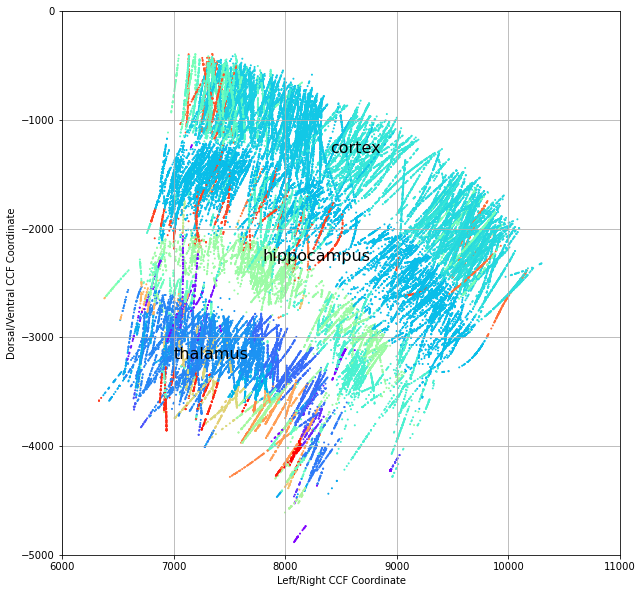

In [14]:
structure_ids = units.ecephys_structure_id
valid_structure_ids = np.invert(np.isnan(structure_ids))
all_structure_ids, labels = np.unique(units.ecephys_structure_id[valid_structure_ids], return_inverse=True)
lr_coords = units.left_right_ccf_coordinate[valid_structure_ids]
dv_coords = units.dorsal_ventral_ccf_coordinate[valid_structure_ids]

plt.figure(figsize=(10,10))
plt.scatter(lr_coords, -dv_coords, s=1, c=labels, cmap='rainbow')
plt.xlim([6000,11000])
plt.ylim([-5000,0])
plt.xlabel('Left/Right CCF Coordinate')
plt.ylabel('Dorsal/Ventral CCF Coordinate')
plt.grid('on')

plt.text(8400,-1300, 'cortex', fontsize=16)
plt.text(7800,-2300, 'hippocampus', fontsize=16)
plt.text(7000,-3200, 'thalamus', fontsize=16)

The above plot shows the location of all units that have been registered to the CCF, viewed in a coronal section looking from the front of the brain. You can see stripes for the cortex, hippocampus, and thalamus.

## Reading data from an NWB file

We package each session's data into a Neurodata Without Borders 2.0 (NWB) file. Calling `get_session_data` on your `EcephysProjectCache` will download such a file and return an `EcephysSession` object.

`EcephysSession` objects contain methods and properties that access the data within an ecephys NWB file and cache it in memory.

Let's look at a file from one of the sessions we selected earlier (from the table of filtered sessions--here I've selected the 2nd row of the filtered sessions table). If you're accessing the data on your local machine, it may take some time to download the full dataset (approximately 2.6 GB):

In [63]:
session_id = filtered_sessions.index.values[1]

session = cache.get_session_data(session_id)

### Reading in spike times

First, we'll learn how to explore the available units in this dataset, and look at their spike times and waveforms. 

Information about the recorded units is available in the `session.units` DataFrame:

In [64]:
units = session.units

print('Total number of units: ' + str(len(units)))

units.head()

Total number of units: 825


,L_ratio,presence_ratio,isolation_distance,snr,waveform_duration,nn_miss_rate,waveform_recovery_slope,waveform_velocity_below,firing_rate,cluster_id,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951088679,0.028062,0.99,51.364291,2.927341,0.260972,0.042563,-0.123497,NaN,7.429131,1,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088664,0.051513,0.99,40.358293,4.105278,0.260972,0.034198,-0.186873,NaN,6.843864,0,...,215.0,APN,8328.0,3018.0,7095.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088734,0.001292,0.99,56.950961,4.040609,0.219765,0.000204,-0.212237,-0.686767,1.418476,5,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088721,0.020218,0.99,58.358552,3.771109,0.302178,0.000945,-0.156234,0.686767,11.517381,4,...,215.0,APN,8316.0,2988.0,7099.0,probeA,See electrode locations,29999.965974,1249.998582,True
951088862,0.011335,0.99,79.934237,2.028992,0.219765,0.009518,-0.100101,-0.892797,19.953126,16,...,215.0,APN,8304.0,2958.0,7103.0,probeA,See electrode locations,29999.965974,1249.998582,True


This table contains a variety of helpful metrics for each unit, such as its firing rate, waveform_amplitude, and CCF structure (`ecephys_structure_acronym`). There are also sorting quality metrics, such as `isi_violations`, `amplitude_cutoff`, and `presence_ratio`. Let's begin by selecting all the units in DG (`DG`) that have a low ISI violations score (an indication of low contamination levels):

In [69]:
DG_units = units[(units.ecephys_structure_acronym == 'DG') &
                (units.isi_violations < 0.1)]

print('Total number of low-contamination DG units: ' + str(len(DG_units)))

DG_units.head()

Total number of low-contamination DG units: 27


,L_ratio,presence_ratio,isolation_distance,snr,waveform_duration,nn_miss_rate,waveform_recovery_slope,waveform_velocity_below,firing_rate,cluster_id,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951090214,0.004208,0.99,71.667279,2.517400,0.384590,0.000205,-0.096453,-0.964744,10.497929,105,...,726.0,DG,8019.0,2162.0,7291.0,probeA,See electrode locations,29999.965974,1249.998582,True
951099104,0.004821,0.99,91.509599,1.084648,1.236181,0.008371,-0.006538,-0.343384,10.437201,302,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095747,0.008970,0.99,71.319775,3.525786,0.563149,0.001964,-0.028881,-0.343384,3.500400,62,...,726.0,DG,7747.0,2334.0,7452.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095759,0.000563,0.99,74.749922,2.515219,0.604355,0.000136,-0.024976,0.000000,1.408227,64,...,726.0,DG,7750.0,2312.0,7451.0,probeB,See electrode locations,29999.917201,1249.996550,True
951095847,0.016339,0.99,33.023656,0.583715,0.563149,0.000568,-0.007735,0.196219,0.130964,69,...,726.0,DG,7754.0,2282.0,7449.0,probeB,See electrode locations,29999.917201,1249.996550,True


We will use the index column of this table (labeled `unit_id`) to extract the data for individual units, such as their spike times and waveforms. 

To retrieve the spike times for one unit as a `numpy` array, simply call `session.spike_times[unit_id]`:

In [70]:
unit_id = DG_units.index.values[0]

session.spike_times[unit_id]

array([4.34538972e+00, 4.42958981e+00, 4.59065666e+00, ...,
       1.04406452e+04, 1.04410064e+04, 1.04410226e+04])

Depending on the session you're analyzing, you may see a warning about invalid time intervals. 

The default session (from the M, SSt, VISl filtered data) (`756029989`) does have some invalid times, which can result from interruptions in data acquisition or problems with the stimulus display. We've chosen to release sessions with some invalid intervals, in order to avoid throwing away valuable data. 

To see the intervals (and reasons for invalidation), just type `session.invalid_times`:

In [71]:
session.invalid_times

""


Here, we see that there are no invalid times.  If we hadn't switched to the DG filtered units, Probe E for the M, SSt, VISl filtered sessions, is missing data between 7675 and 7692 seconds. If you're analyzing this section of the data, this will explain why there's a gap during this interval, which is not due to the fact that all units suddenly became silent on this probe.

### Reading in unit waveforms

We store precomputed mean waveforms for each unit in the `mean_waveforms` attribute on the `EcephysSession` object. This is a dictionary which maps unit ids to xarray [DataArrays](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html). These have `channel` and `time` (seconds, aligned to the detected event times) dimensions. The data values are in microvolts, as measured at the recording site.

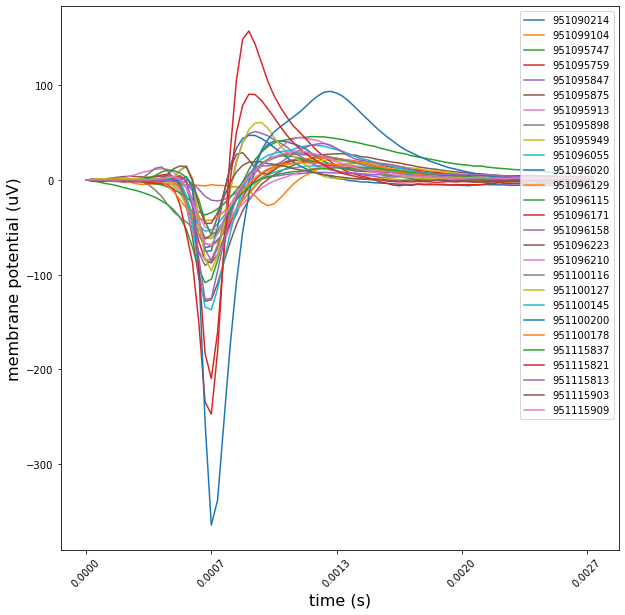

In [73]:
units_of_interest = DG_units.index.values

waveforms = {uid: session.mean_waveforms[uid] for uid in units_of_interest}
peak_channels = {uid: session.units.loc[uid, 'peak_channel_id'] for uid in units_of_interest}

# plot the mean waveform on each unit's peak channel/
plot_mean_waveforms(waveforms, units_of_interest, peak_channels)
plt.show()

This plot only includes the peak channel waveform for each unit, but the NWB file contains the waveform across the entire probe, allowing you to analyze how it propagates along the probe axis.

### Stimulus presentation times

Next, we'll look at how to access information about the visual stimuli that were presented.

`session.stimulus_names` will show the stimuli that are available in this session:

In [74]:
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes',
 'drifting_gratings_contrast']

Access the stimulus table for a particular stimulus type can be done with the following line of code:

In [75]:
stim_table = session.get_stimulus_table(['drifting_gratings'])

stim_table.head()

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,0.8,0.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1586.180717,2.0,drifting_gratings,1588.182387,15.0,2.00167,246
3799,0.8,180.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1589.183244,2.0,drifting_gratings,1591.184924,2.0,2.00168,247
3800,0.8,45.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1592.185737,2.0,drifting_gratings,1594.187427,1.0,2.00169,248
3801,0.8,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1595.188274,2.0,drifting_gratings,1597.189944,8.0,2.00167,249
3802,0.8,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1598.190777,2.0,drifting_gratings,1600.192447,2.0,2.00167,250


This shows us the parameters for each stimulus presentation (trial), indexed by a unique stimulus presentation ID.

## Aligning data to stimulus presentations

Reading in the data is an essential first step, but most analyses require some form of stimulus alignment. This part of the tutorial will show you how to do that!

First we need to select some trials to use. Let's use full-field flashes (gray-to-black or gray-to-white):

In [76]:
presentation_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'flashes']

presentation_times = presentation_table.start_time.values
presentation_ids = presentation_table.index.values

### Aligning spike times

The AllenSDK includes some convenient functions for aligning spikes; if you just want to see all the spike times that fall between the start and end of a set of trials, you can call `session.presentationwise_spike_times`. This takes a list of stimulus presentation IDs and unit IDs, and returns a DataFrame:

In [77]:
times = session.presentationwise_spike_times(
    stimulus_presentation_ids=presentation_ids,
    unit_ids=units_of_interest
)

times.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1285.959336,3647,951096210,0.029549
1285.962736,3647,951096171,0.032949
1285.977269,3647,951099104,0.047483
1285.985302,3647,951096210,0.055516
1286.018836,3647,951096115,0.089049


The `times` DataFrame contains columns for the stimulus presentation ID and unit ID, as well as the `time_since_stimulus_presentation_onset`, which is the spike time shifted to account for the trial start time.

Using this DataFrame as input, we can make a raster plot for one trial:

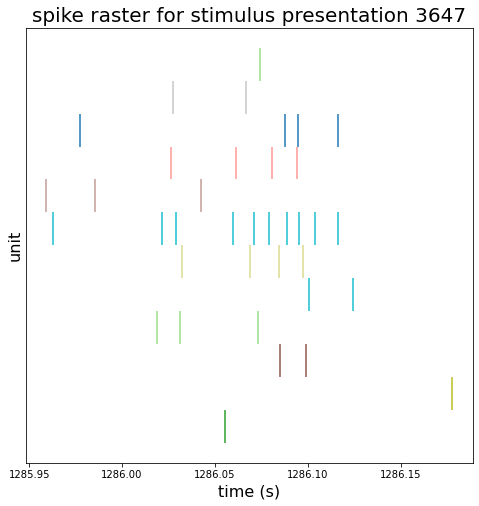

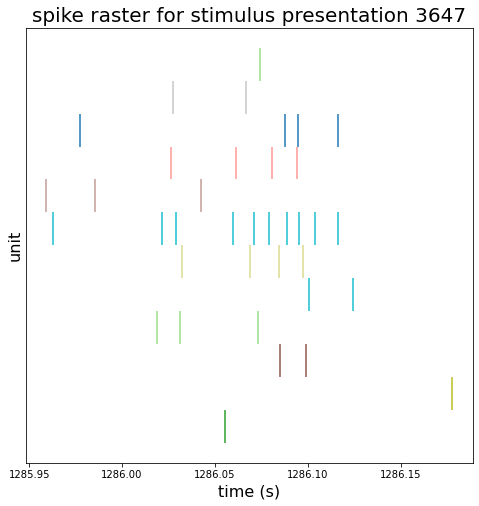

In [78]:
first_drifting_grating_presentation_id = times['stimulus_presentation_id'].values[0]
plot_times = times[times['stimulus_presentation_id'] == first_drifting_grating_presentation_id]

raster_plot(plot_times,
            title=f'spike raster for stimulus presentation {first_drifting_grating_presentation_id}')

## Receptive field mapping

Because receptive field analysis is so central to interpreting results related from the visual system, every experiment in the Neuropixels Visual Coding dataset includes a standardized receptive field mapping stimulus. This stimulus is always shown at the beginning of the session, and uses the same parameters for every mouse. 

We can look at the `stimulus_presentations` DataFrame in order to examine the parameters of the receptive field mapping stimulus in more detail. The receptive field mapping stimulus consists of drifting Gabor patches with a circular mask, so we're going to filter the DataFrame based on `stimulus_name == 'gabors'`:

In [79]:
rf_stim_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'gabors']

len(rf_stim_table)

3645

There are 3645 trials for the receptive field mapping stimulus. What combination of stimulus parameters is used across these trials? Let's see which parameters actually vary for this stimulus:

In [80]:
keys = rf_stim_table.keys()
[key for key in keys if len(np.unique(rf_stim_table[key])) > 1]

['orientation',
 'start_time',
 'stop_time',
 'x_position',
 'y_position',
 'duration',
 'stimulus_condition_id']

We can ignore the parameters related to stimulus timing (`start_time`, `stop_time`, and `duration`), as well as `stimulus_condition_id`, which is used to find presentations with the same parameters. So we're left with `orientation`, `x_position`, and `y_position`

In [81]:
print('Unique orientations : ' + str(list(np.sort(rf_stim_table.orientation.unique()))))
print('Unique x positions : ' + str(list(np.sort(rf_stim_table.x_position.unique()))))
print('Unique y positions : ' + str(list(np.sort(rf_stim_table.y_position.unique()))))

Unique orientations : [0.0, 45.0, 90.0]
Unique x positions : [-40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0]
Unique y positions : [-40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0]


What about the drifting grating parameters that don't vary, such as size (in degrees), spatial frequency (in cycles/degree), temporal frequency (in Hz), and contrast?

In [82]:
print('Spatial frequency: ' + str(rf_stim_table.spatial_frequency.unique()[0]))
print('Temporal frequency: ' + str(rf_stim_table.temporal_frequency.unique()[0]))
print('Size: ' + str(rf_stim_table['size'].unique()[0]))
print('Contrast: ' + str(rf_stim_table['contrast'].unique()[0]))

Spatial frequency: 0.08
Temporal frequency: 4.0
Size: [20.0, 20.0]
Contrast: 0.8


In order to visualize receptive fields, we're going to use a function in the `ReceptiveFieldMapping` class, one of the stimulus-specific analysis classes in the AllenSDK. Let's import it and create a `rf_mapping` object based on the `session` we loaded earlier:

In [83]:
from allensdk.brain_observatory.ecephys.stimulus_analysis.receptive_field_mapping import ReceptiveFieldMapping

rf_mapping = ReceptiveFieldMapping(session)

Let's use the same DG units we extracted previously.

Calculating the receptive field is as simple as calling `get_receptive_field()` with a unit ID as the input argument.

In [84]:
RF = rf_mapping.get_receptive_field(DG_units.index.values[3])

/nas/longleaf/home/pentonre/.local/lib/python3.7/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:760: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1)], with a maximum overlap of 0.015480718203590982 seconds.
  warnings.warn("You've specified some overlapping time intervals "


This warning is not a problem--it's just letting you know that you have some overlapping time intervals.

This method creates a 2D histogram of spike counts at all 81 possible stimulus locations, and outputs it as a 9 x 9 matrix. It's summing over all orientations, so each pixel contains the spike count across 45 trials.
 
To plot it, just display it as an image. The matrix is already in the correct orientation so that it matches the layout of the screen (e.g., the upper right pixel contains the spike count when the Gabor patch was in the upper right of the screen).

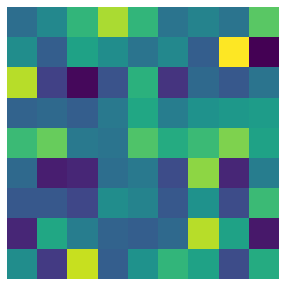

In [85]:
plt.figure(figsize=(5,5))
_ = plt.imshow(RF)
_ = plt.axis('off')

This DG unit doesn't have a receptive field in response to Gabors--it's not surprising because hippocampal cells do not have receptive fields for simple visual stimuli.  Their receptive fields are more complicated and represent where the animal is in spatially.

If you continued with V1 units from the pre-lab:  This particular unit has a receptive field that's near the center of the screen, but shifted slightly to the lower right.

Let's plot the receptive fields for the units in DG we selected previously (none of them should have receptive fields for a Gabor stimulus!  Remember, they were used as controls in Figure 1g of the Siegle et al., 2021 paper):

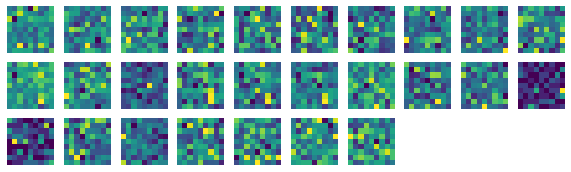

In [86]:
def plot_rf(unit_id, index):
    RF = rf_mapping.get_receptive_field(unit_id)
    _ = plt.subplot(6,10,index+1)
    _ = plt.imshow(RF)
    _ = plt.axis('off')
    
_ = plt.figure(figsize=(10,6))
_ = [plot_rf(RF, index) for index, RF in enumerate(DG_units.index.values)]

It's important to look at the receptive fields for any the visual cortex units you're analyzing, especially if you're looking at interactions between units in different areas. The strength cross-area interactions will vary depending on the degree of receptive field overlap of the recording sites

## Create Figure 1c graph from the Siegle et al., 2021 paper
https://www-nature-com.libproxy.lib.unc.edu/articles/s41586-020-03171-x

Github Repository for the coding used to make figures: https://github.com/AllenInstitute/neuropixels_platform_paper

We've already been using code that sets us up to recreate Figure 1c, we just need to import a function `DriftingGratings`, load the specific session id used, and plot everything. 

In [87]:
from math import pi
from allensdk.brain_observatory.ecephys.stimulus_analysis import DriftingGratings

We're now loading the session data

In [88]:
# load session data
sessions = cache.get_session_table()
session_id = 756029989
session = cache.get_session_data(session_id)

We're defining dg as DriftingGratings(session).  I've commented out the LFP data code because I haven't been able to get the LFP data downloaded onto LongLeaf yet.

In [90]:
# load LFP data
dg = DriftingGratings(session)
#probe_id = session.probes.index.values[3]
#lfp = session.get_lfp(probe_id)

Creating the figure (I've combined the two code cells here because I needed to & also comment out the LFP part of the figure).

/nas/longleaf/apps/anaconda/2019.10.ood/envs/py379/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/nas/longleaf/apps/anaconda/2019.10.ood/envs/py379/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-4.0, 6.0)

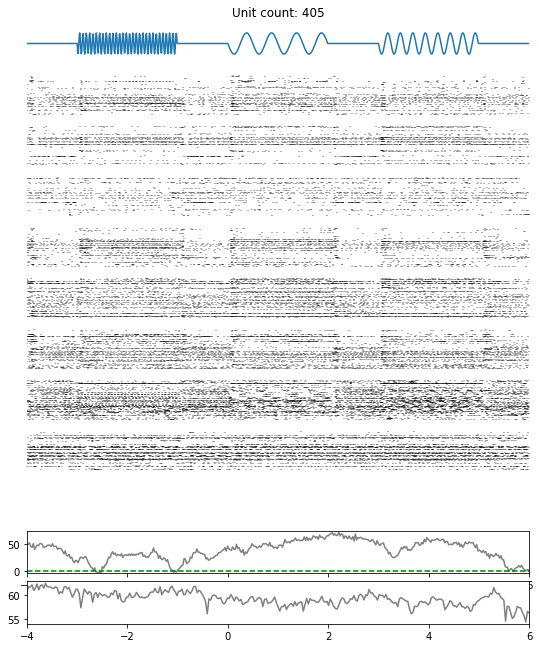

In [91]:
plt.figure(1711, figsize=(9,12))
plt.clf()
    
trial_number = 248

areas = ('VISp', 'VISl', 'VISrl', 'VISal', 'VISpm', 'VISam', 'LGd', 'LP')

total_units = 0

freq1 = dg.stim_table.iloc[trial_number-1].temporal_frequency
freq2 = dg.stim_table.iloc[trial_number].temporal_frequency
freq3 = dg.stim_table.iloc[trial_number+1].temporal_frequency

t1 = np.linspace(0,2*pi*freq1*2,200)
t2 = np.linspace(0,2*pi*freq2*2,200)
t3 = np.linspace(0,2*pi*freq3*2,200)
z = np.zeros((100,))

a = np.concatenate((z,t1,z,t2,z,t3,z),axis=0)

num_plots = 13

plt.subplot(num_plots,1,1)
plt.plot(1-np.sin(a))
plt.xlim([0,len(a)])
plt.ylim([-1,3])
plt.axis('off')

for area_idx, area in enumerate(areas):
    
    units = session.units[(session.units.ecephys_structure_acronym == area)].index.values
                         
    total_units += len(units)

    t = np.arange(-4,6.0,0.001) 
    
    spike_data = session.presentationwise_spike_counts(
                bin_edges = t,
                stimulus_presentation_ids = dg.stim_table.index.values[trial_number],
                unit_ids = units
            )
    
    a = spike_data.sum(dim='time_relative_to_stimulus_onset')

    x, y = np.where(np.squeeze(spike_data.data))
    
    plt.subplot(num_plots,1,area_idx+2)
    
    plt.scatter(t[x],y,s=1, c='k',marker='|',alpha=0.4)
    
    plt.xlim([np.min(t),np.max(t)])
   
    plt.axis('off')
    
    plt.subplot(num_plots,1,1)
plt.title('Unit count: ' + str(total_units))

plt.subplot(num_plots,1,11)

bounds = dg.stim_table.start_time.values[trial_number] + t

selection = (session.running_speed.start_time >= bounds[0]) & \
                  (session.running_speed.start_time < bounds[-1])

running_speeds = session.running_speed[selection].velocity
starts = session.running_speed[selection].start_time
ends = session.running_speed[selection].end_time

t = np.linspace(-4,6,len(running_speeds))

plt.plot(t, running_speeds, 'gray')
plt.plot([t[0],t[-1]],[0,0],'--g')
plt.ylim([-3,75])
plt.xlim([-4,6])

plt.subplot(num_plots,1,12)

eye_info = session.get_pupil_data()

selection = (eye_info.index.values >= bounds[0]) & \
            (eye_info.index.values < bounds[-1])

pupil_x = eye_info.pupil_center_x[selection]
pupil_y = eye_info.pupil_center_y[selection]
pupil_width = eye_info.pupil_width[selection]

t = np.linspace(-4,6,len(pupil_width))


plt.subplot(num_plots,1,12)
plt.plot(t, pupil_width, 'gray')
plt.xlim([-4,6])

#lfp_plot = lfp.loc[dict(time=slice(np.min(bounds),np.max(bounds)))]

#D = lfp_plot.data[:,40] * 1e6
#plt.subplot(num_plots,1,10)

#t = np.linspace(-4,6,len(D))

#plt.plot(t,D,'-g',linewidth=0.8)

#plt.xlim([np.min(t), np.max(t)])

#plt.ylim([-1500,1500])

## Resources:
Markdown text and code for this Jupyter notebook were from the Neuropixels Visual Coding Tutorial from Allen Institute for Brain Science: https://github.com/AllenInstitute/brain_observatory_examples/blob/master/Open%20for%20NeuroScience%202020/Open%20for%20(Neuro)Science%202021%20-%20Neuropixels%20Visual%20Coding%20ANSWER%20KEY.ipynb

and

from the code shared as part of Siegle et al., 2021: https://github.com/AllenInstitute/neuropixels_platform_paper/blob/master/Figure1/Figure1c.py


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html

highly recommend: https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html

### Other resources
Video of Allen Institute Tutorials for 2-photon & Neuropixels data: https://youtu.be/UtbeF-Id5Ic

Jupyter notebooks for the tutorials are located here along with cheat sheets: https://github.com/AllenInstitute/brain_observatory_examples/tree/master/Open%20for%20NeuroScience%202020


Insert text. 